<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/00_Introduccion/05_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>TensorFlow</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón</i></h5>
  <h5 align="center"><i>Análisis Numérico</i></h5>
  </font>

## Introducción

*TensorFlow* es una *API* desarrollado por *Google* y es el conjunto de herramientas libres que se utiliza más ampliamente en el desarrollo de inteligencia artificial.

Existen multiples versiones de *TensorFlow*, sin embargo en escencia vamos a contar con la version 1.x y la versión 2.x. La principal diferencia entre ambas es que la versión 1.x hace uso de **grafos** para representar el flujo de los datos y la versión 2.x se apoya en [Keras](https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-1/) para generar modelos más intuitivos.

En este documento nos enfocaremos en la versión 2.x de *TensorFlow* con soporte para *GPU's*.

## *Tensor Flow*

Existen varias formas de hacer uso de *TensoFlow*, sin embargo dadas las características del curso, nos vamos a enfocar en la forma declarativa.

Lo primero que necesitamos hacer para acceder a la versión de *TensorFlow* con soporte para GPU's en Google Colab, es desinstalar la versión actual e instalar la versión con soporte para GPU's, además de cambiar el entorno de ejecución del jupyter.

1.   Para cambiar el entorno de ejecución: Primero, ir al menú *Runtime o Entorno de ejecución*, seleccionar *Cambiar tipo de tiempo de ejecución*, y en el cuadro emergente, en *Acelerador de hardware*, seleccione *GPU*, guardamos el cambio y listo.
2.   Posteriormente validamos que se tenga acceso al *GPU*.

In [ ]:
import tensorflow as tf

print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.6.0


La celda superior nos indica que tenemos acceso al GPU's y que harémos uso de la versión 2.5.0 de *TensoFlow*.

### *FrameWork*

Inicialmente TensorFlow fue diseñado para hacer uso de grafos para representar los datos y las operaciones que se realizan sobre los mismos. Parte de esa forma de trabajar aun funciona con la versión 2.x de *TensorFlow* y es buena idea comenzar con la misma.

Como en la mayoria de *FrameWorks*, *TensorFlow* cuenta con multiples elementos que ayudan al programador, algunos de estos elementos son:


*   Constantes.
*   Variables.
*   Tensores.
*   Escalares.





#### Operaciones

Pensemos que, como parte de nuestro modelo necesitamos procesar 2 entradas y devolver un resultado. Esta operación es muy sencilla pero muestra como se debe pensar en el flujo de los datos.


In [ ]:
# se realiza la suma de 3 y 5 haciendo uso de tf y del metodo add
a = tf.add(3, 5)
# mostramos el elemento del grafo llamado a
print(a)
# se muestra el resultado de la operación en el nodo a
print(a.numpy())

tf.Tensor(8, shape=(), dtype=int32)
8


Podemos pensar en esta operación de la siguiente forma.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/sumaTF.png?raw=true" width="700">
</center>

#### Ventaja del grafo

El grafo nos da la ventaja de construir de manera organizada y visual la forma en la que se procesan los datos.

Ahora pensemos que deseamos realizar la siguiente operación. 

$$\left(2\times3\right)^{\left(2+5\right)}$$

¿Cómo se vería este grafo y cómo se escribe esta operación con *TensorFlow*?.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/powTF.png?raw=true" width="700">
</center>

In [ ]:
# Variables de Python
x = 2
y = 3

# Operaciones y grafo de TensorFlow
op1 = tf.add(x, y)         
op2 = tf.multiply(x, y)    
op3 = tf.pow(op2, op1)

# Veamos el nodo op3
print(op3)

# El resultado de dicha operación es
print(op3.numpy())

tf.Tensor(7776, shape=(), dtype=int32)
7776


#### Red Neuronal

Conforme vamos agregando más nodos al grafo, este cada vez se parece más a una red, incluso podemos llegar a un punto en el cual el grafo sea similar a una red neuronal.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/som.gif?raw=true" width="700">
</center>

### Acceso a la *GPU*

En la sección anterior vimos que ya se contaba con acceso a la *GPU*, ahora vamos a ver que tan buena idea es hacer uso de la misma.

Vamos a definir 2 métodos que hagan uso de *TensorFlow*, uno de ellos procesando los datos en la *CPU* y el otro en la *CPU*.

In [ ]:
# Biblioteca para medir el tiempo
import timeit

# Validamos que se tenga acceso a la GPU de google colab
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print(
        '\n\nNo se tiene habilitado el acceso a la GPU, revisa la configuracion '
        'del notebook.\n\n')
    raise SystemError('No se cuenta con GPU')

# Metodo que realiza el reduce en la CPU de los valores aleatorios de una matriz
def cpu():
    # con esta linea se procesa el bloque en la CPU
    with tf.device('/cpu:0'):
      # generamos una matriz de 100x100x100 con valore aleatorios entre (0,1)
      random_image_cpu = tf.random.normal((100, 100, 100))
      # mediante tensorflow se realiza el reduce y se devuelve un valor
      return tf.math.reduce_sum(random_image_cpu).numpy()

# Metodo que realiza el reduce en la GPU de los valores aleatorios de una matriz
def gpu():
    # con esta linea se procesa el bloque en la GPU
    with tf.device('/device:GPU:0'):
      # generamos una matriz de 100x100x100 con valore aleatorios entre (0,1)
      random_image_gpu = tf.random.normal((100, 100, 100))
      # mediante tensorflow se realiza el reduce y se devuelve un valor
      return tf.math.reduce_sum(random_image_gpu)
  
# Provemos ambos metodos
cpu()
gpu()

# Se ejecutan ambos algoritmos 10 veces y se muestran los respectivos tiempos
print('Se muestra la suma del tiempo de haber ejecutado estos algoritmos '
      '10 veces.')
# Seccion para la CPU
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
# Seccion para la GPU
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
# Mejora en el tiempo de la GPU respecto a la CPU
print('Mejora en el tiempo de ejecucion de GPU '
      'v.s. CPU: {}x'.format(int(cpu_time/gpu_time)))

Se muestra la suma del tiempo de haber ejecutado estos algoritmos  10 veces.
CPU (s):
0.18778029899999638
GPU (s):
0.004059490999992477
Mejora en el tiempo de ejecucion de GPU v.s. CPU: 46x


### Aplicaciones

El ejemplo anterior solo muestra una pequeña parte de un algoritmo en la cual se puede mejorar en gran medida el desempeño de una red neuronal mediate *TensorFlow* en su versión para *GPU's*.

En gran medida las operaciones dentro de una red neuronal (y en general en el aprendizaje de máquina) pueden ser mejoradas mediante el uso de los *GPU's* disponibles.

En la celda anterior se puede ver de manera clara el por qué el uso de TensorFlow se ha vuelto tan popular, sin embargo no olivdemos que muchos de los procesos llevados a cabo quedan ocultos.

## Red Neuronal al instante

Vamos a 'construir' una red neuronal en un par de celdas mediante *TensorFlow*, el código e imágenes mostradas a continuación se toman del [manual oficial](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419) de *TensorFlow*.

En este ejemplo vamos a mostrar y entrenar una red neuronal que pueda clasificar imágenes de prendas.

<table>
  <tr><td>
    <img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/fashion-mnist-sprite.png?raw=true" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### *MNIST*

Dado que esta red neuronal clasifica imágenes de ropa, necesitamos una **base de datos** grande de estas imágenes.

*MNIST* es una base de datos accesible mediante la red y con una gran cantidad de datos para entrenar nuestras redes neuronales.

Así que el primer paso es cargar esta base de datos en la sesión actual de *google colab*, esto se realiza en la siguiente celda.

In [ ]:
# TensorFlow y tf.keras
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Al ejecutar la celda anterior vamos a tener en memoria cuatro arreglos en *NumPy*:

* Los arreglos *train_images* y *train_labels* son los arreglos que conforman el *training set* y que usa el modelo de datos para aprender/entrenar.
* El modelo es probado contra los arreglos *test_images*, y *test_labels* que conforman el *test set*.

Las imágenes son arreglos de *NumPy* (matrices) de 28x28, con valores en cada entrada (pixeles) que varian de 0 a 255. Los *labels* es un arreglo de enteros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Palyera/blusa</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trusa</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Bota al tobillo</td>
  </tr>
</table>

Dado que los nombres de las clases (Class name) no vienen incluidos en la información que recién descargamos, es necesario almacenarlos en una variable de *Python*.

In [ ]:
class_names = ['Camiseta/Blusa', 'Trusa', 'Pullover', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Sneaker', 'Bolsa', 'Bota al tobillo']

#### Contenido del *data set*

El contenido del set de datos antes de entrenar el modelo es el siguiente, hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por mapas de bits (matrices) de 28x28:

In [ ]:
train_images.shape

(60000, 28, 28)

Se cuenta con 60,000 etiquetas para el entrenamiento.

In [ ]:
len(train_labels)


60000

Cada etiqueta es un entero entre $0-9$

In [ ]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como arreglos de *numpy* (matrices) de 28x28:

In [ ]:
test_images.shape

(10000, 28, 28)

Finalmente el conjunto de pruebas cuenta con 10,000 etiquetas para el momento de validar la efectividad del modelo.

In [ ]:
len(test_labels)

10000

### Preprocesando los datos

Es frecuente al hacer uso de imágenes, que estas requieran un "preprocesamiento" antes de ser utilizadas por el modelo.

Veamos la primer imagen del conjunto de imágenes y comprobemos que son imágenes de 28x28 pixeles y cada pixel toma un valor en el rango entre $0-255$.

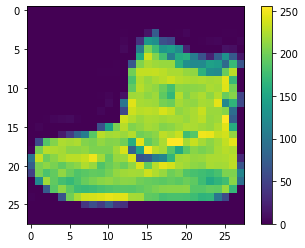

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Es necesario escalar los valores de las imágenes en un rango de $0$ a $1$ antes de alimentarlos al modelo de la red neuronal. Para hacero, es necesario dividir los valores por $255$. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

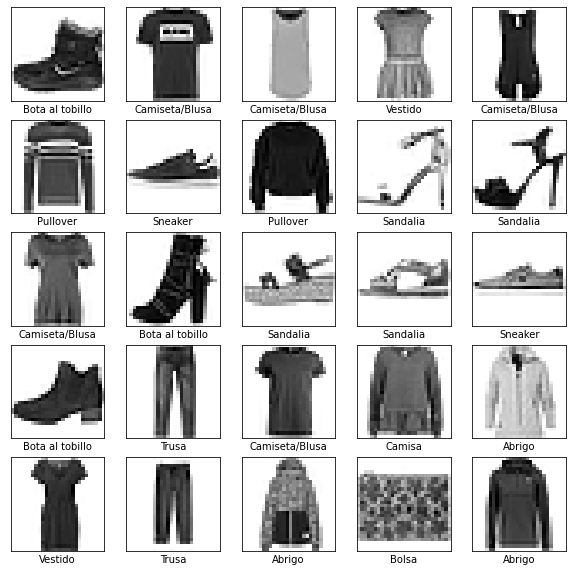

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Contruir el modelo

El modelo de esta red neuronal es un modelo por capas como el que podemos ver en la siguiente imagen.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/reco_ropa.png?raw=true" width="700">
</center>

Existetodo un marco teórico detras de la construcción de este modelo y para mayor detalle se invita a revisar las referencias. En esta sección vamos a mostrar el código necesario y una breve explicación del mismo.

En la siguiente celda se genera el modelo.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28x28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles, pensemos que la imagen que "aplana" (*flatten*) en una sola fila. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Ambas capas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

Otro de los parámetros que reciben las capas son las **funciones de activación** (*relu* y *softmax*). Estas funciones de activación son elementos fundamentales en el diseño de una red neuronal. 

### Compilando el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilación del modelo:

* *Loss function*: También conocida como función de costos, mide que tan exacto es el modelo durante el entrenamiento. La idea es minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer*: Mediante el optimizador es como el modelo se actualiza basado en el set de datos que ve y la evaluación de la función de costos. Uno de los optimizadores que se usan de manera más frecuente es el **descenso del gradiente**.
* *Metrics*: Se usan para monitorear los pasos de entrenamiento y de pruebas.

El siguiente ejemplo usa *accuracy* (exactitud), es decir la fracción de la imágenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar el modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluido en el arreglo `test_images`. Resta verificar que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4975 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

### Interpretando imágenes

Se le muestra un conjunto de imagenes al modelo `test_images` y el modelo nos devuelve un una lista `prediccion` que nos indica que es lo que interpreta el modelo de la imágen en cada una de sus entradas.

In [ ]:
predicciones = model.predict(test_images)

In [ ]:
# FUNCIONES AUXILIARES PARA GRAFICAR
# grafica una imagen y su respectiva prediccion por el modelo
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# muestra la probabilidad que indica el modelo de cada prenda de ropa
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Veamos que interpretación le da el modelo a la imágen 0

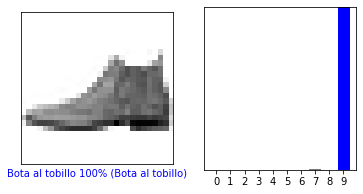

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels)
plt.show()

Y veamos ahora que sucede con la imágen 12

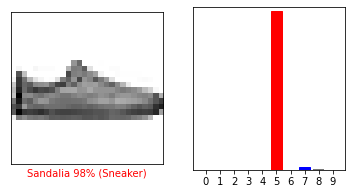

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels)
plt.show()

## Referencias

*   https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
*   http://www.saedsayad.com/clustering_som.htm
*   https://www.tensorflow.org/install
*   https://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/

